### Compile Model Results & Analyze
1. Load Results and transform data

In [29]:
import pandas as pd

# Load CSVs
NN_Results = pd.read_csv('results/NN_Results.csv')
SVR_Results = pd.read_csv('results/SVR_Results.csv')
DT_Results = pd.read_csv('results/DT_Results.csv')

# Drop rows with missing values to avoid misalignment
NN_Results = NN_Results.dropna()
SVR_Results = SVR_Results.dropna()
DT_Results = DT_Results.dropna()

# Get minimum length to align data
min_len = min(len(NN_Results), len(SVR_Results), len(DT_Results))

# Trim all to same length
NN_trim = NN_Results.head(min_len)
SVR_trim = SVR_Results.head(min_len)
DT_trim = DT_Results.head(min_len)

# Build MSE DataFrame with Model names as Columns
mse_data = pd.DataFrame({
    'NN': NN_trim['MSE'],
    'SVR': SVR_trim['MSE'],
    'DT': DT_trim['MSE']
})

# Build MAPE DataFrame with Model names as Columns
mape_data = pd.DataFrame({
    'NN': NN_trim['MAPE'],
    'SVR': SVR_trim['MAPE'],
    'DT': DT_trim['MAPE']
})

# Build R² DataFrame with Model names as Columns
r2_data = pd.DataFrame({
    'NN': NN_trim['R²'],
    'SVR': SVR_trim['R²'],
    'DT': DT_trim['R²']
})

# Create Array for aiding in charts
metrics = [mse_data, mape_data, r2_data]

mse_data

,NN,SVR,DT
0,0.238734,0.378375,0.238734
1,0.227931,0.360155,0.227931
2,0.229212,0.377447,0.229212
3,0.226151,0.384199,0.226151
4,0.215933,0.388283,0.215933
5,0.222079,0.356144,0.222079
6,0.218544,0.362189,0.218544
7,0.241601,0.395515,0.241601
8,0.225995,0.377145,0.225995
9,0.247327,0.384504,0.247327


#### Create Comparision Charts
1. Boxplots
2. Violin Plot

Conclusion:

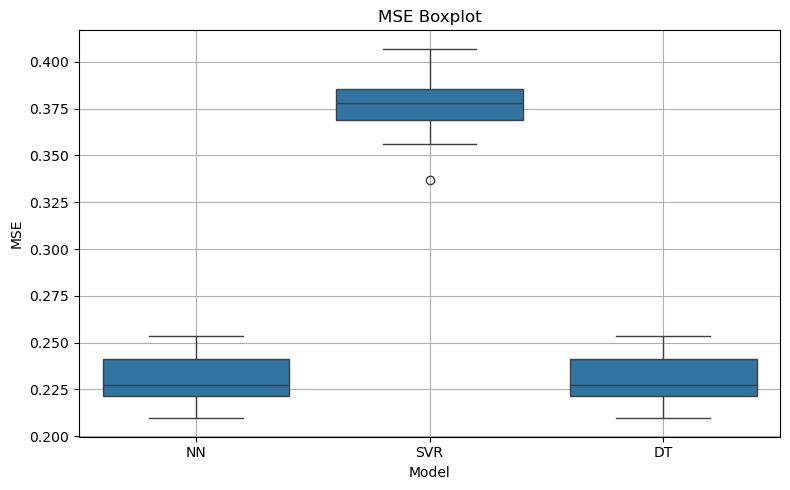

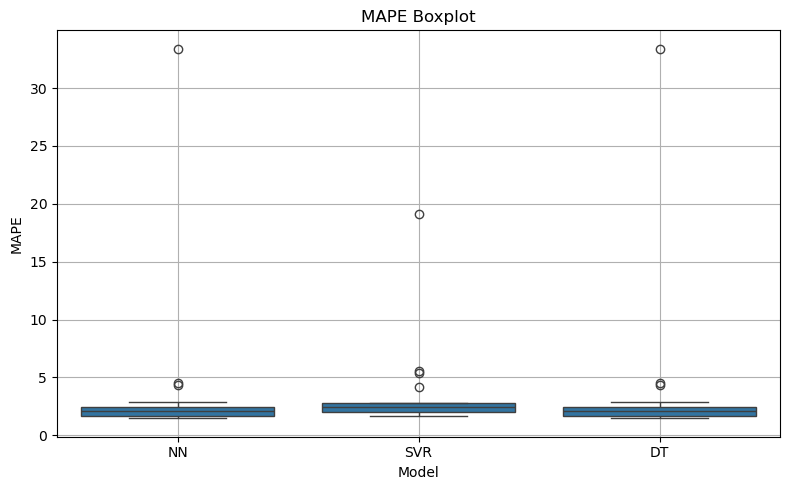

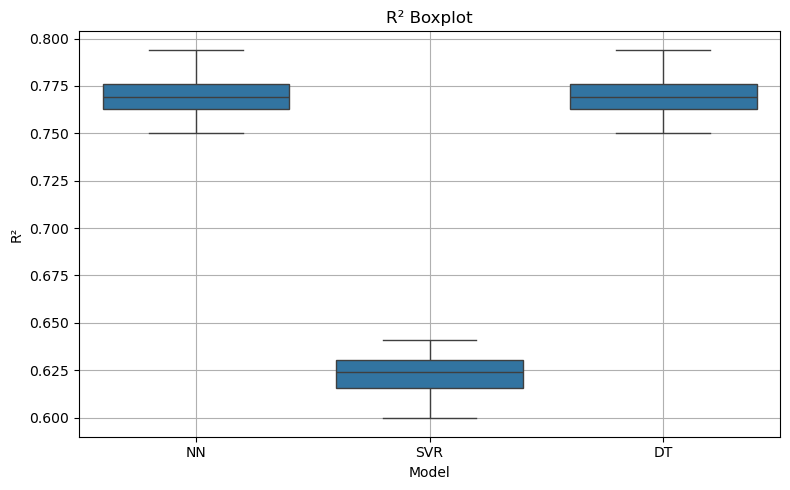

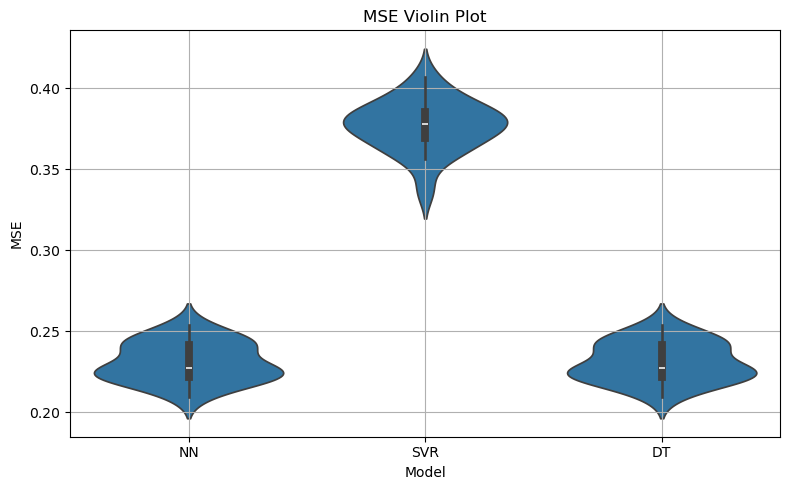

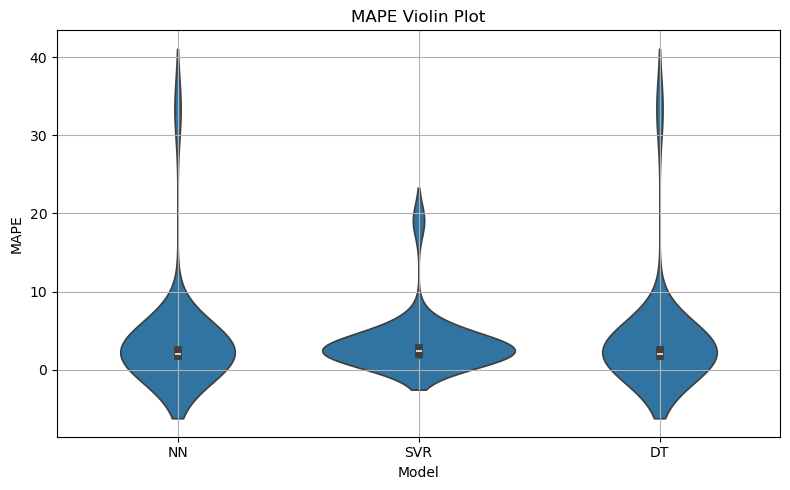

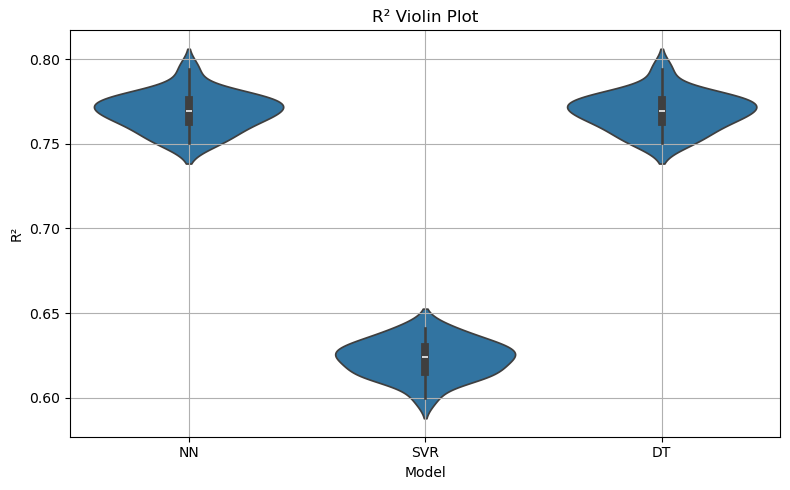

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Functions to plot both boxplot and violin plot for a metric
def boxplot_metric(metric_df, metric_name):
    melted = metric_df.melt(var_name='Model', value_name=metric_name)

    # Boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Model', y=metric_name, data=melted)
    plt.title(f'{metric_name} Boxplot')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def violinplot_metric(metric_df, metric_name):
    melted = metric_df.melt(var_name='Model', value_name=metric_name)

    # Violin plot
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='Model', y=metric_name, data=melted, inner='box')
    plt.title(f'{metric_name} Violin Plot')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot all metrics
boxplot_metric(mse_data, 'MSE')
boxplot_metric(mape_data, 'MAPE')
boxplot_metric(r2_data, 'R²')

violinplot_metric(mse_data, 'MSE')
violinplot_metric(mape_data, 'MAPE')
violinplot_metric(r2_data, 'R²')